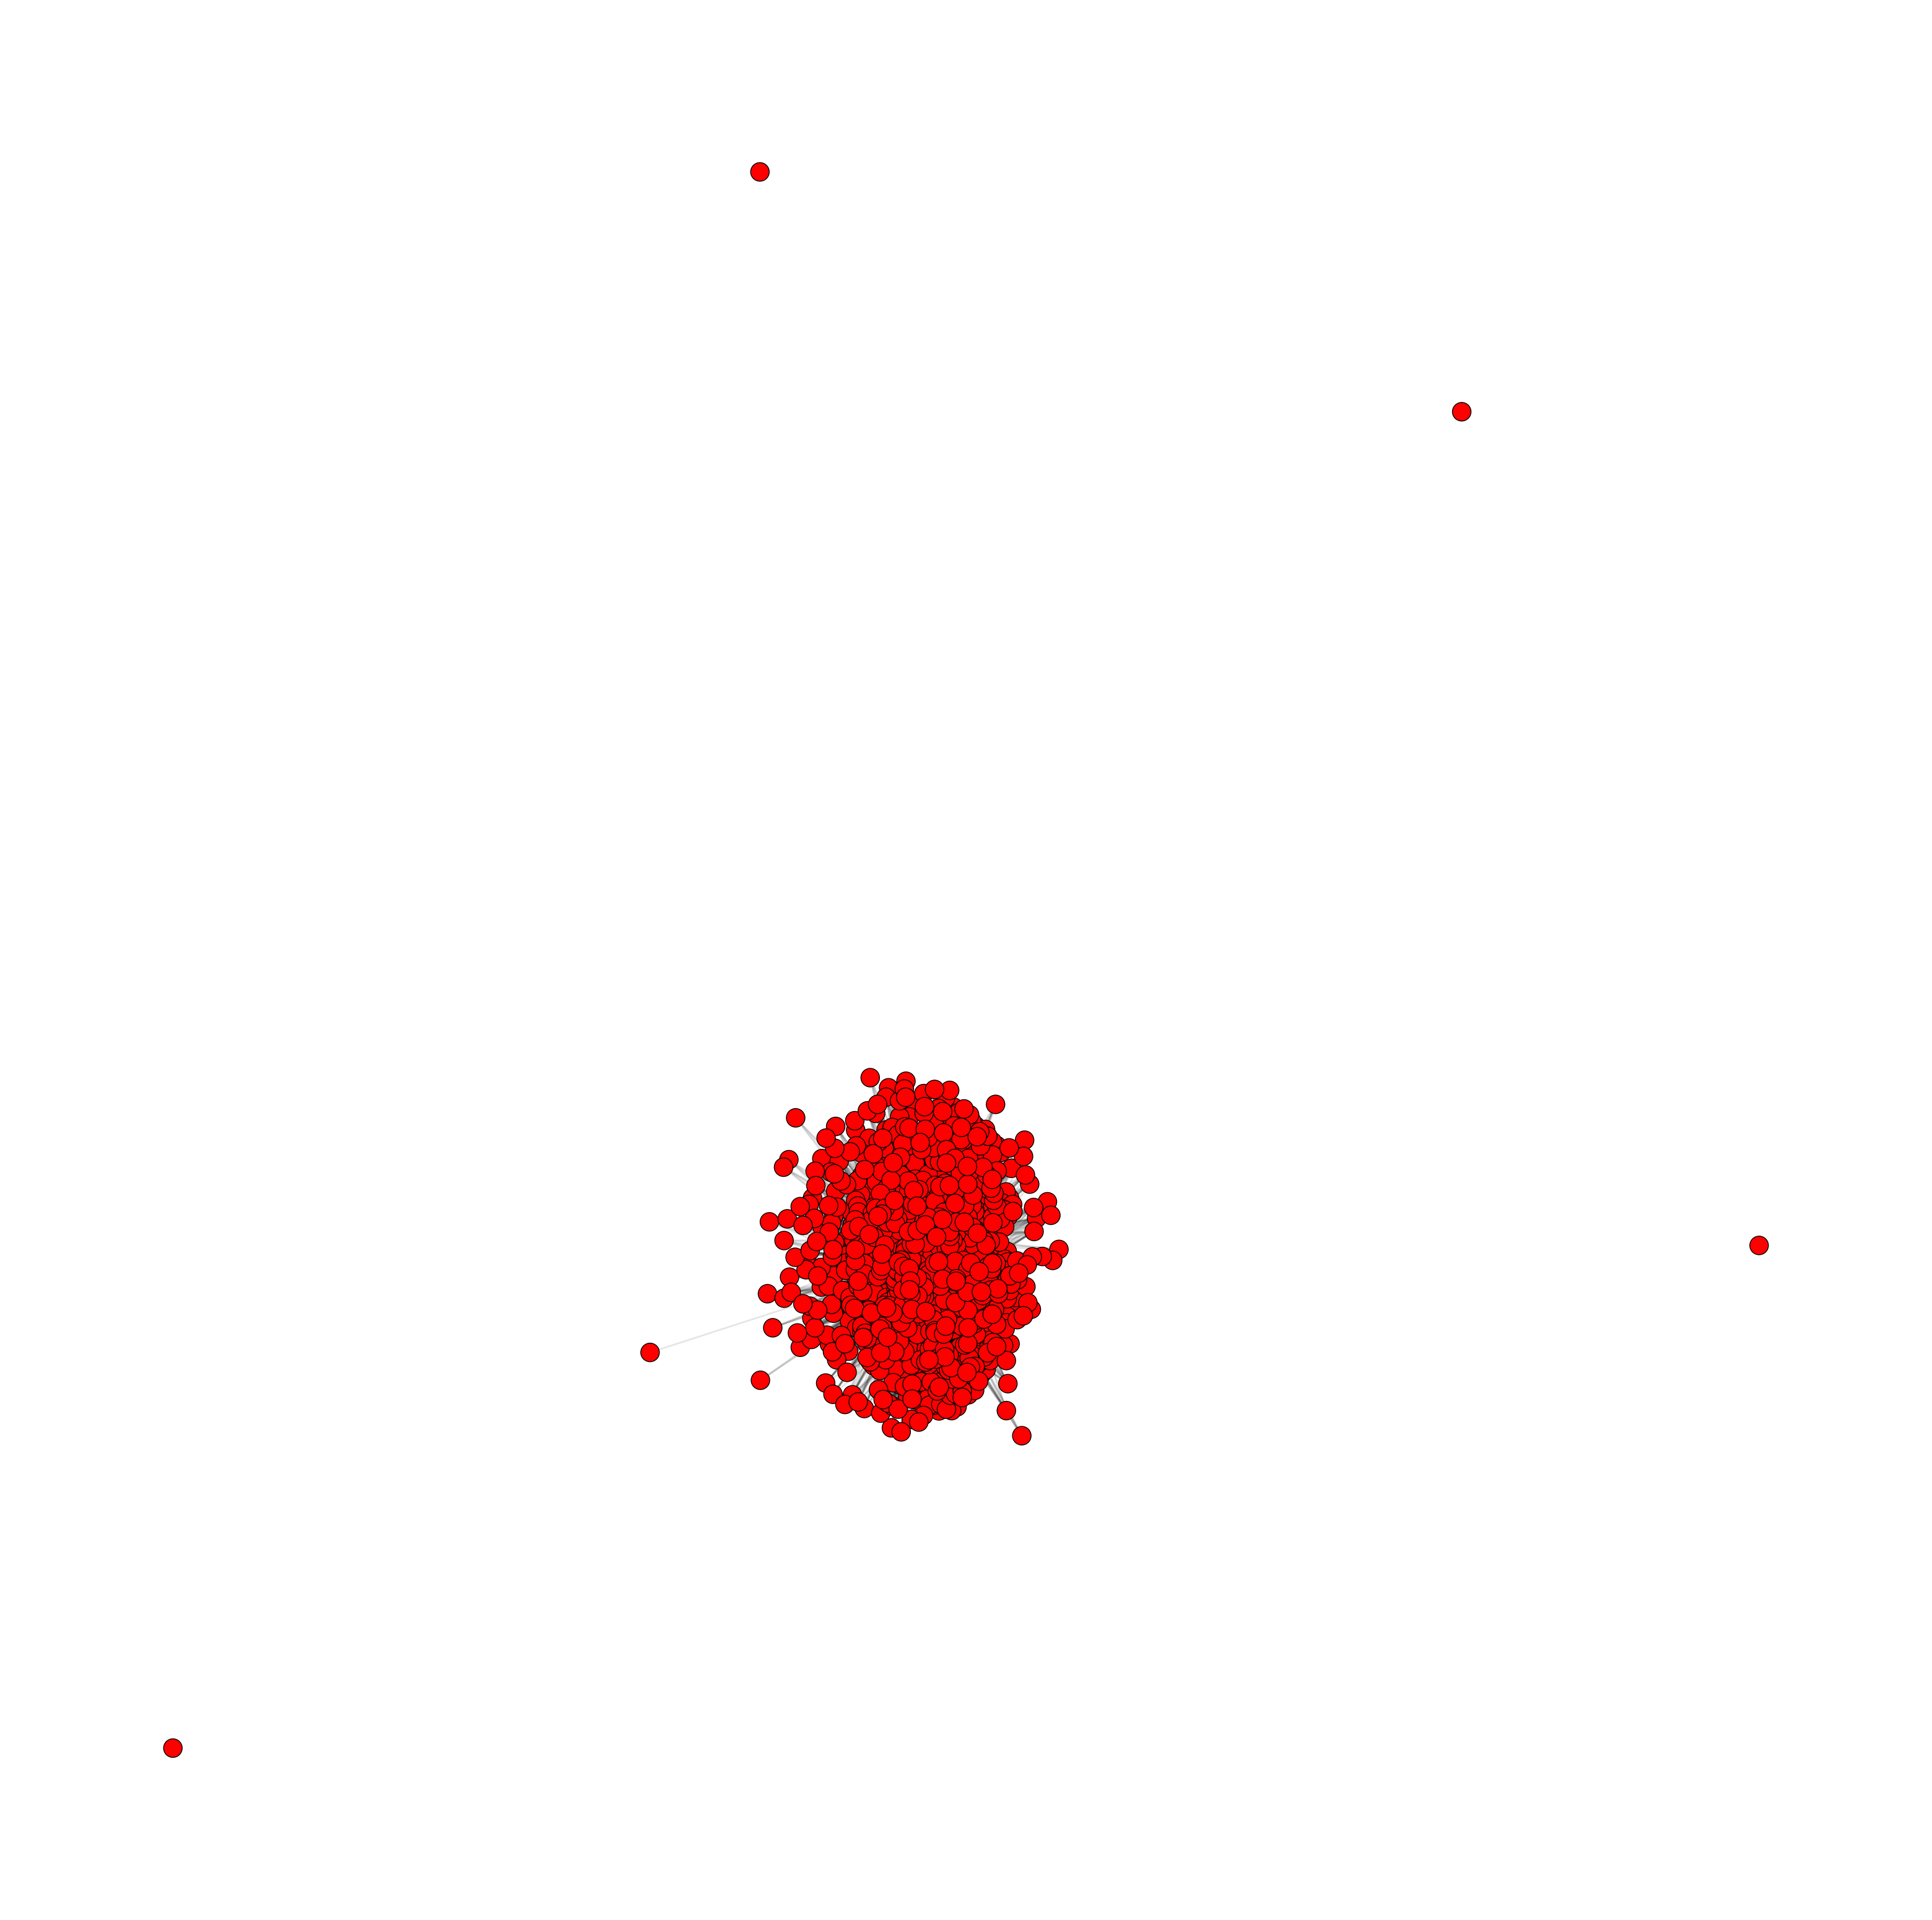

In [20]:
#PLOTE DO GRAFO GERAL PARA ARESTAS COM 60% OU MAIS DA ARESTA DE MAIOR PESO
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

# Lê o arquivo CSV 
df = pd.read_csv('matriz.csv', header=0, index_col=0)

# Substitui as vírgulas por pontos
df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Converte as strings em floats
df = df.astype(float)

# Cria um gráfico com pesos
g = ig.Graph.Weighted_Adjacency(df.values.tolist(), mode="UNDIRECTED")

# Obtem o peso máximo
max_weight = max(g.es['weight'])

# Cria um subgrafo com arestas que têm 60% ou mais do peso máximo
sub_g = g.subgraph_edges(g.es.select(weight_ge=max_weight*0.60), delete_vertices=False)

# Plota o subgrafo com o layout Fruchterman Reingold
layout = sub_g.layout("fr")
fig, ax = plt.subplots(figsize=(40, 40))
edge_opacity = 0.1
ig.plot(sub_g, target=ax, layout=layout, edge_color=[(0,0,0, edge_opacity)] * sub_g.ecount())

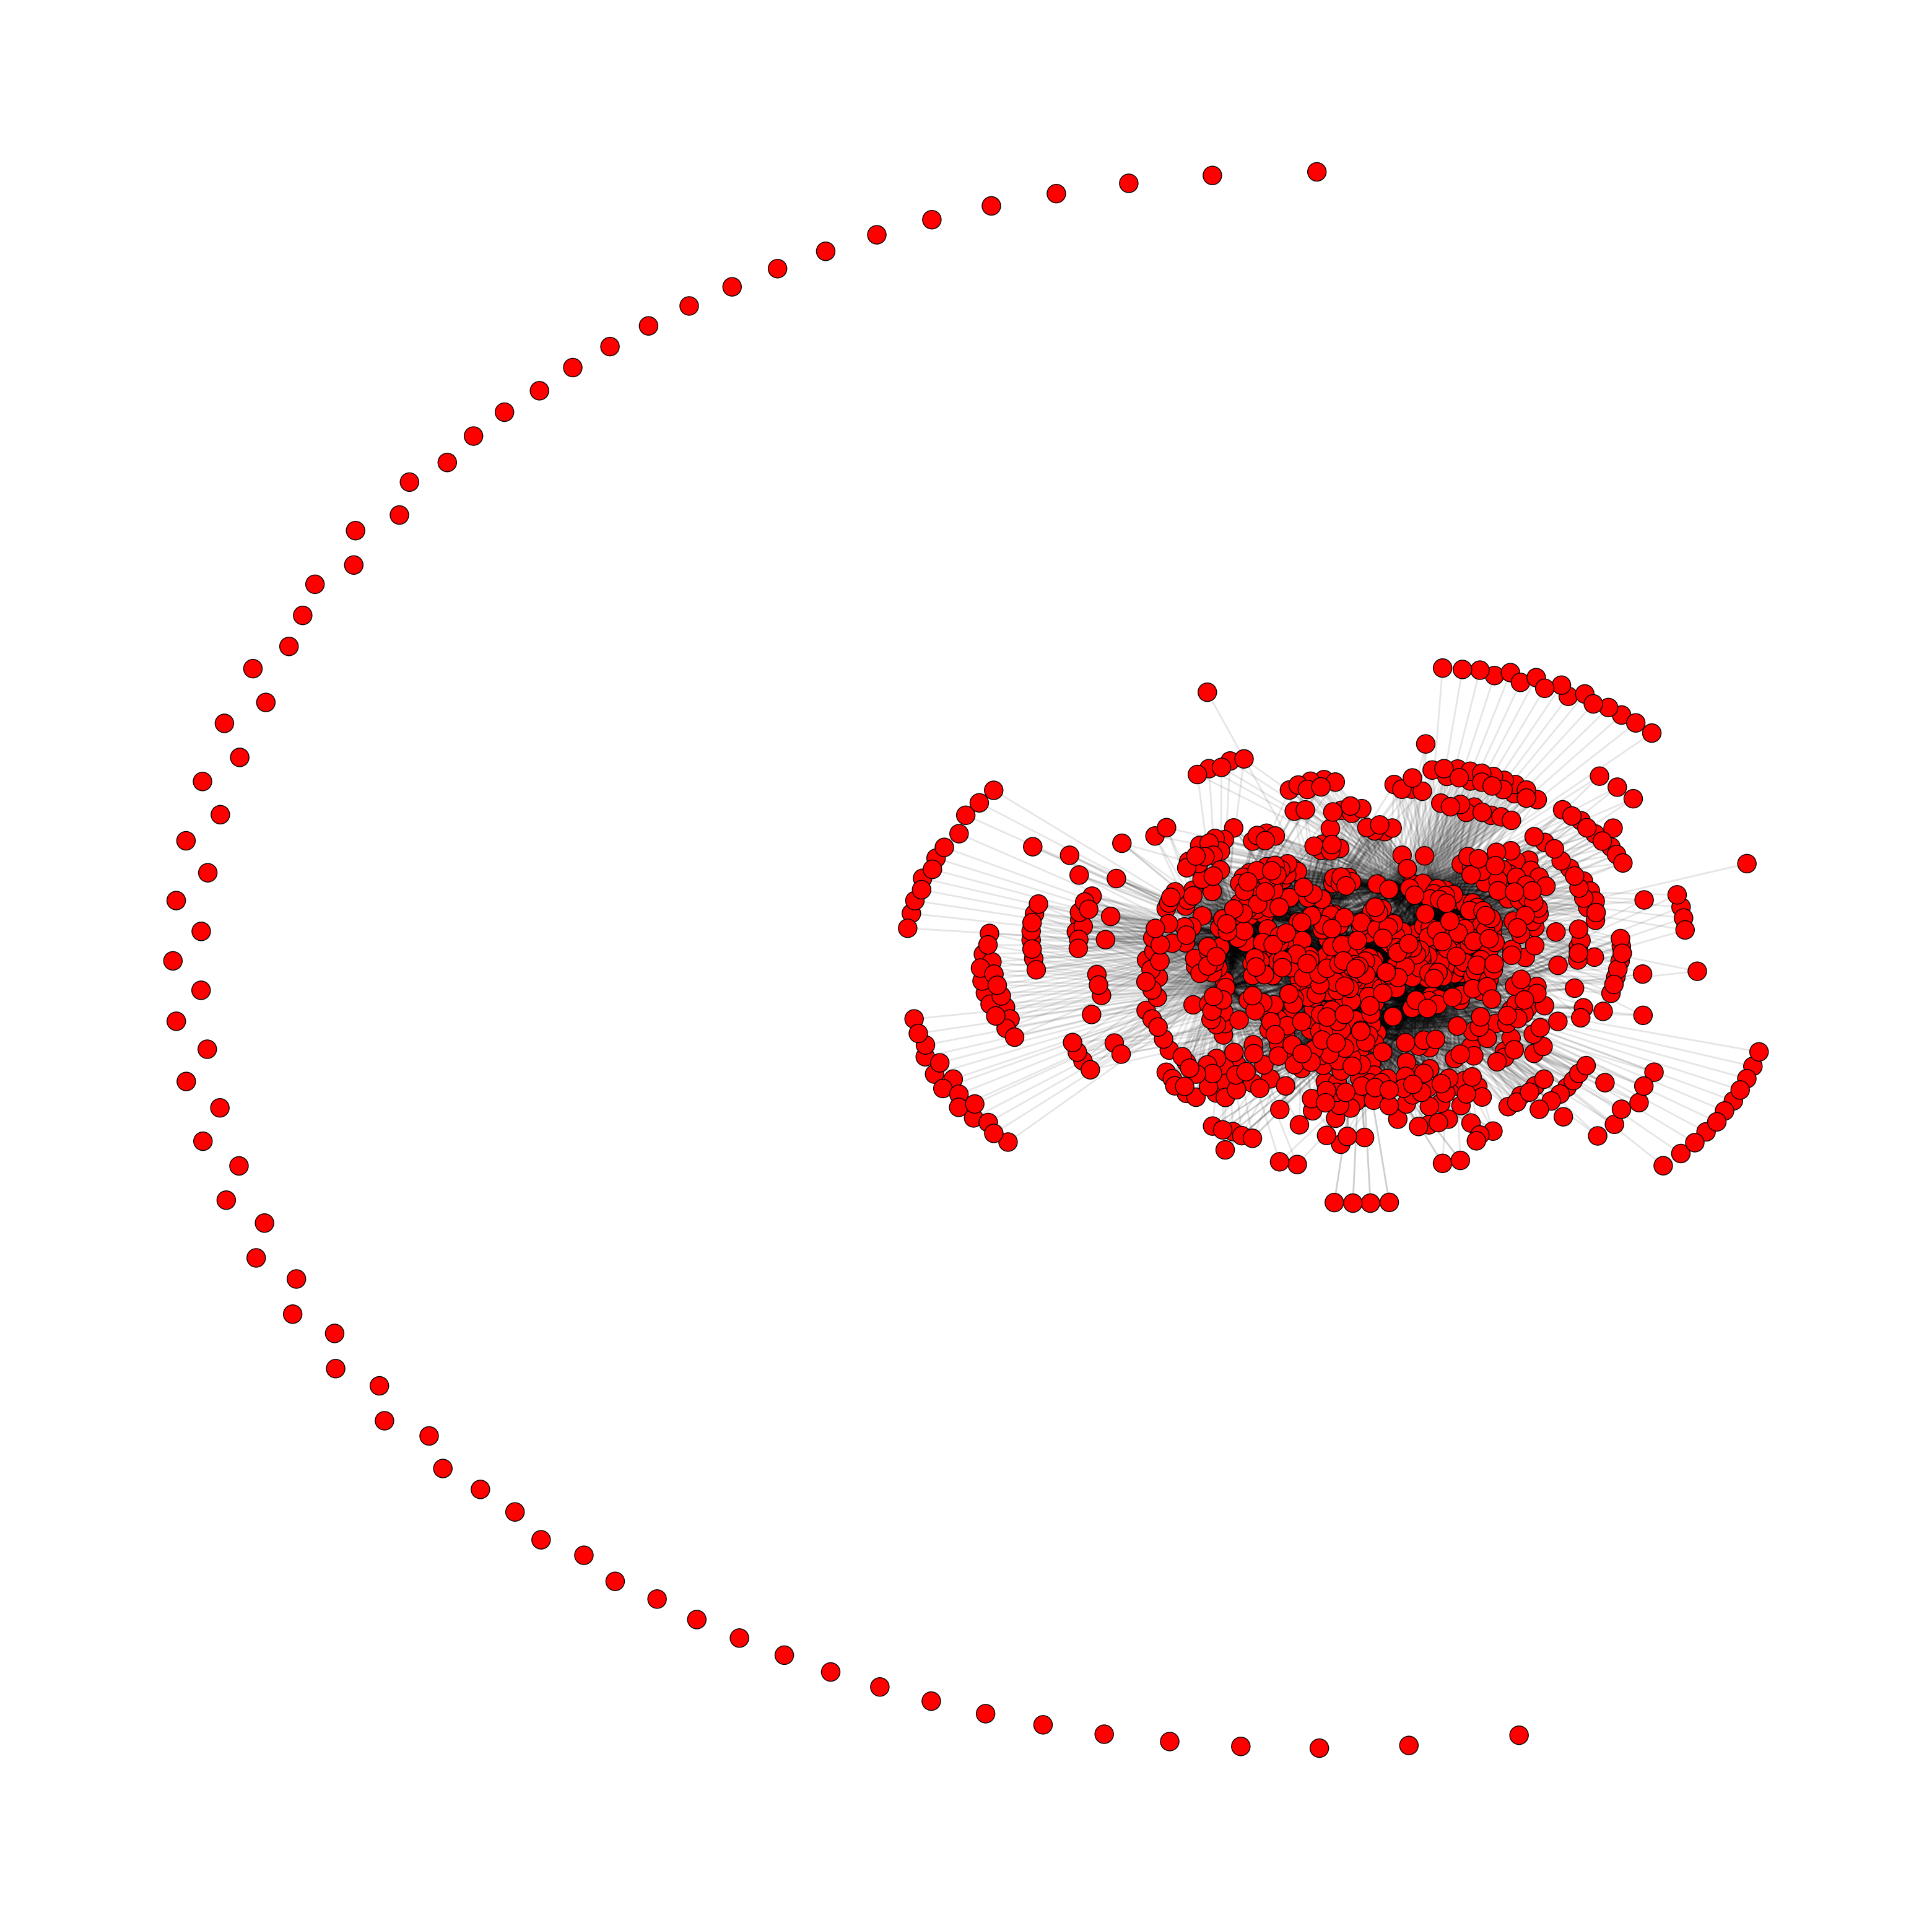

In [21]:
#PLOTE DO GRAFO GERAL PARA ARESTAS COM 70% OU MAIS DA ARESTA DE MAIOR PESO
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

# Lê o arquivo CSV 
df = pd.read_csv('matriz.csv', header=0, index_col=0)

# Substitui as vírgulas por pontos
df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Converte as strings em floats
df = df.astype(float)

# Cria um gráfico com pesos
g = ig.Graph.Weighted_Adjacency(df.values.tolist(), mode="UNDIRECTED")

# Obtem o peso máximo
max_weight = max(g.es['weight'])

# Cria um subgrafo com arestas que têm 60% ou mais do peso máximo
sub_g = g.subgraph_edges(g.es.select(weight_ge=max_weight*0.70), delete_vertices=False)

# Plota o subgrafo com o layout Fruchterman Reingold
layout = sub_g.layout("fr")
fig, ax = plt.subplots(figsize=(40, 40))
edge_opacity = 0.1  
ig.plot(sub_g, target=ax, layout=layout, edge_color=[(0, 0, 0, edge_opacity)] * sub_g.ecount())

2.0
Comunidade 0 (cor: red, quantidade de vértices: 507, quantidade de arestas: 13383): [1, 3, 5, 7, 8, 18, 21, 23, 25, 26, 29, 31, 32, 33, 34, 35, 43, 44, 47, 55, 56, 59, 60, 62, 63, 64, 65, 67, 69, 71, 72, 73, 74, 75, 76, 77, 79, 81, 82, 84, 85, 87, 88, 89, 91, 95, 96, 98, 102, 103, 106, 107, 108, 112, 113, 114, 115, 117, 118, 119, 120, 122, 127, 128, 129, 131, 132, 135, 136, 137, 139, 149, 150, 152, 155, 158, 161, 163, 165, 166, 167, 169, 171, 172, 173, 174, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 192, 193, 197, 200, 201, 205, 206, 209, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 223, 229, 230, 231, 232, 235, 237, 238, 241, 242, 244, 246, 249, 251, 253, 254, 255, 256, 257, 258, 259, 260, 263, 264, 265, 270, 278, 279, 280, 281, 283, 284, 285, 286, 288, 289, 290, 293, 295, 297, 298, 299, 302, 305, 306, 307, 308, 309, 310, 312, 313, 316, 318, 319, 320, 321, 322, 324, 327, 328, 329, 330, 331, 332, 333, 337, 339, 340, 341, 343, 345, 347, 349, 352, 353, 354,

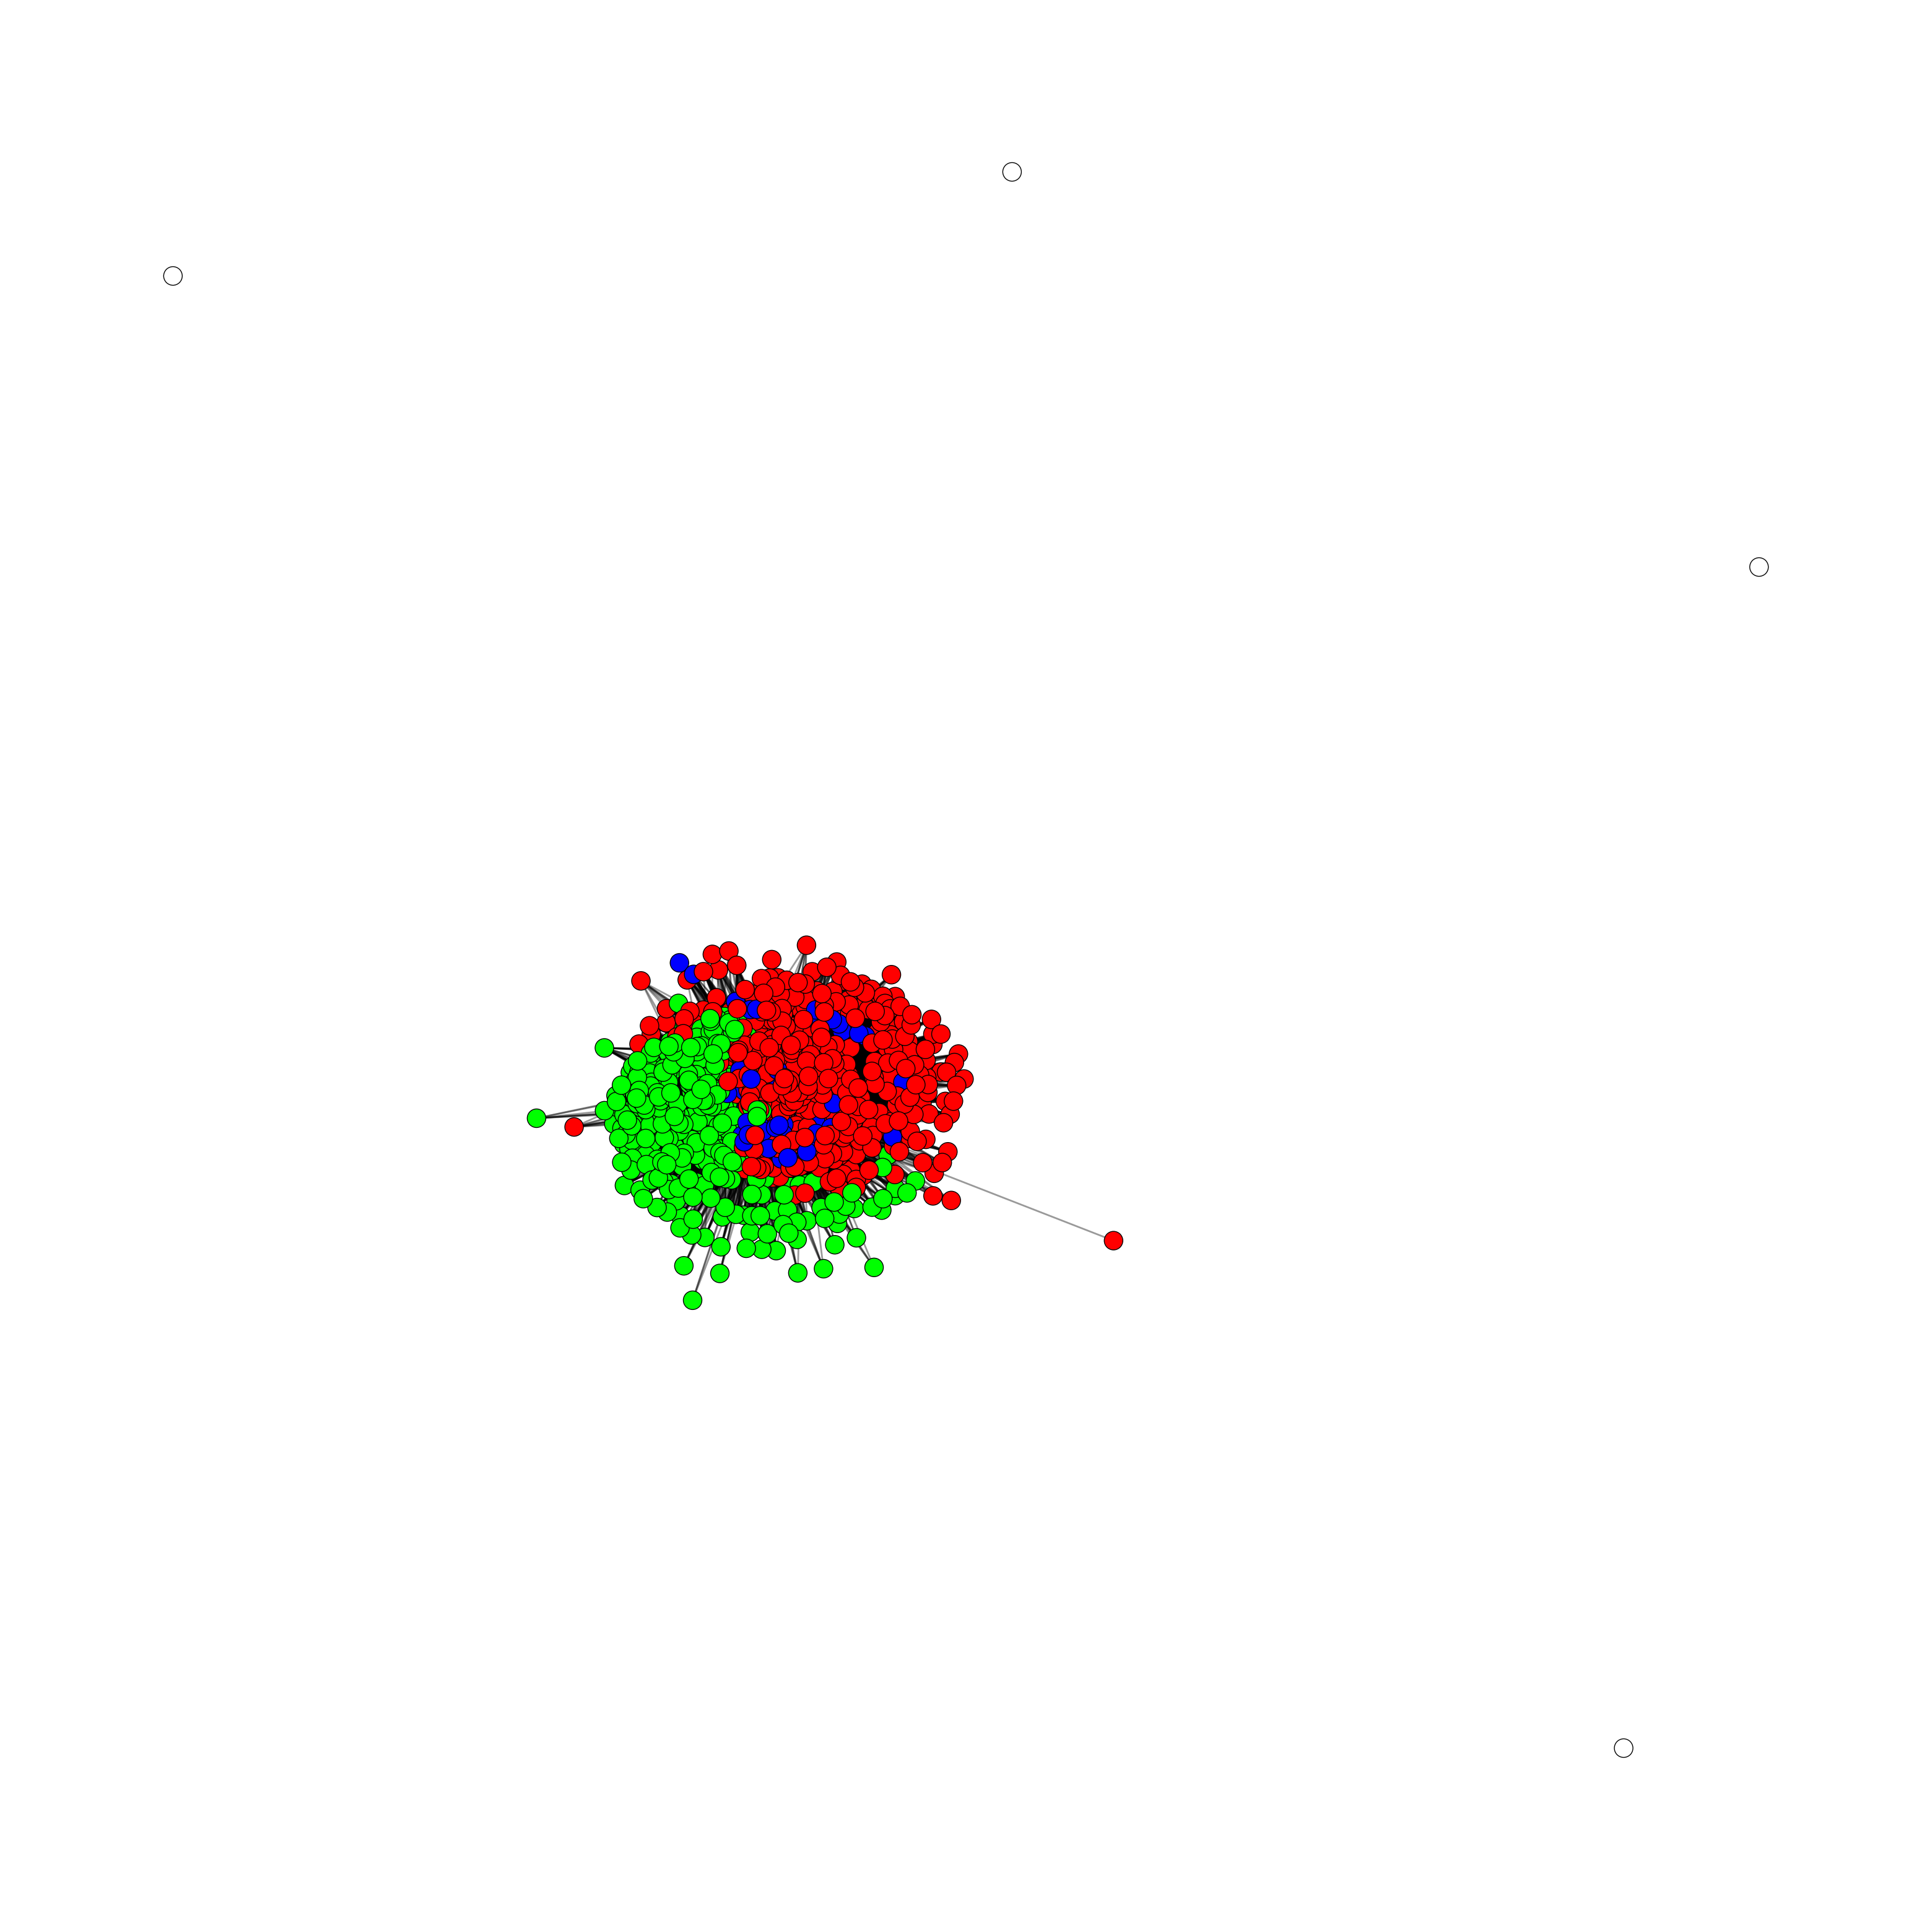

In [22]:
#DETECÇÃO DE COMUNIDADE NO PRIMEIRO GRAFO USANDO FASTGREEDY
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

# Lê o arquivo CSV 
df = pd.read_csv('matriz.csv', header=0, index_col=0)

# Substitui as vírgulas por pontos
df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Converte as strings em floats
df = df.astype(float)

# Cria um gráfico com pesos
g = ig.Graph.Weighted_Adjacency(df.values.tolist(), mode="UNDIRECTED")

# Obtem o peso máximo
max_weight = max(g.es['weight'])
print(max_weight)

# Cria um subgrafo com arestas que têm 60% ou mais do peso máximo
sub_g = g.subgraph_edges(g.es.select(weight_ge=max_weight*0.60), delete_vertices=False)


# Define os rótulos dos vértices como atributos
sub_g.vs["name"] = df.index.tolist()

# Aplica o algoritmo de Fast Greedy para detecção de comunidades e devolve um dendrograma
clusters = sub_g.community_fastgreedy(weights=sub_g.es['weight'])

# Converte o dendrograma em uma partição no grafo
partition = clusters.as_clustering()

# Obtem a associação de vértices às comunidades
membership = partition.membership

# Cria um dicionário para armazenar as comunidades e seus vértices
communities = {}
for vertex, community in enumerate(membership):
    if community not in communities:
        communities[community] = []
    communities[community].append(vertex)

# Remove as comunidades que possuem apenas um vértice
for community, vertices in list(communities.items()):
    if len(vertices) == 1:
        del communities[community]
        membership = [m if m != community else None for m in membership]

colors = ["red", "green", "blue", "yellow", "pink"]
# Atualiza as cores dos vértices com base na nova associação à comunidade
vertex_colors = [membership[i] if membership[i] is not None else "white" for i in range(sub_g.vcount())]

# Atribui uma cor a cada comunidade
community_colors = [colors[i % len(colors)] if i is not None else "white" for i in membership]

# Mapeia os índices dos vértices no subgrafo para os rótulos ou índices originais do DataFrame
vertex_labels_original = df.index.tolist()
vertices_mapped_to_original = {community: [vertex_labels_original[i] for i in vertices] for community, vertices in communities.items()}

# Imprime os resultados
for community, vertices in vertices_mapped_to_original.items():
    # Encontra as arestas que têm ambos os vértices na comunidade atual
    edges = [e for e in sub_g.es if e.source in vertices and e.target in vertices]
    # Calcula a quantidade de arestas
    num_edges = len(edges)
    color = colors[community % len(colors)]
    print(f"Comunidade {community} (cor: {color}, quantidade de vértices: {len(vertices)}, quantidade de arestas: {num_edges}): {vertices}")
    
# Encontra os vértices que não têm comunidade
vertices_sem_comunidade = [v for v in vertex_labels_original if v not in sum(vertices_mapped_to_original.values(), [])]

# Imprime os vértices que não têm comunidade
print(f"Vértices sem comunidade, quantidade de vertices: {len(vertices_sem_comunidade)}: {vertices_sem_comunidade}")


# Plota o grafo com as novas cores dos vértices
layout = sub_g.layout_fruchterman_reingold()
fig, ax = plt.subplots(figsize=(40, 40))
ig.plot(sub_g, target=ax, layout=layout, edge_color=[(0, 0, 0, 0.4)] * sub_g.ecount(), vertex_color=community_colors)
plt.show()

2.0
Comunidade 0 (cor: red, quantidade de vértices: 249, quantidade de arestas: 962): [1, 2, 3, 5, 7, 15, 28, 31, 32, 33, 35, 44, 55, 59, 60, 63, 65, 71, 72, 73, 74, 89, 91, 95, 98, 102, 103, 106, 107, 112, 113, 114, 115, 118, 127, 131, 136, 139, 146, 153, 163, 169, 171, 179, 181, 184, 185, 188, 190, 192, 197, 199, 205, 206, 208, 209, 211, 217, 218, 220, 221, 223, 232, 234, 241, 242, 251, 253, 257, 259, 260, 264, 268, 277, 278, 279, 284, 285, 290, 297, 298, 305, 306, 307, 310, 312, 320, 321, 328, 332, 333, 337, 340, 353, 354, 362, 366, 377, 378, 381, 382, 384, 385, 390, 400, 403, 405, 409, 414, 420, 426, 439, 440, 441, 443, 446, 464, 474, 476, 477, 478, 479, 483, 488, 494, 499, 500, 502, 504, 506, 509, 511, 516, 519, 521, 528, 529, 533, 535, 536, 539, 543, 555, 561, 565, 571, 576, 588, 595, 597, 599, 601, 605, 607, 608, 609, 613, 618, 619, 622, 627, 630, 633, 639, 640, 644, 645, 646, 651, 653, 660, 664, 669, 673, 682, 685, 687, 702, 716, 717, 720, 721, 722, 726, 727, 731, 733, 744, 749

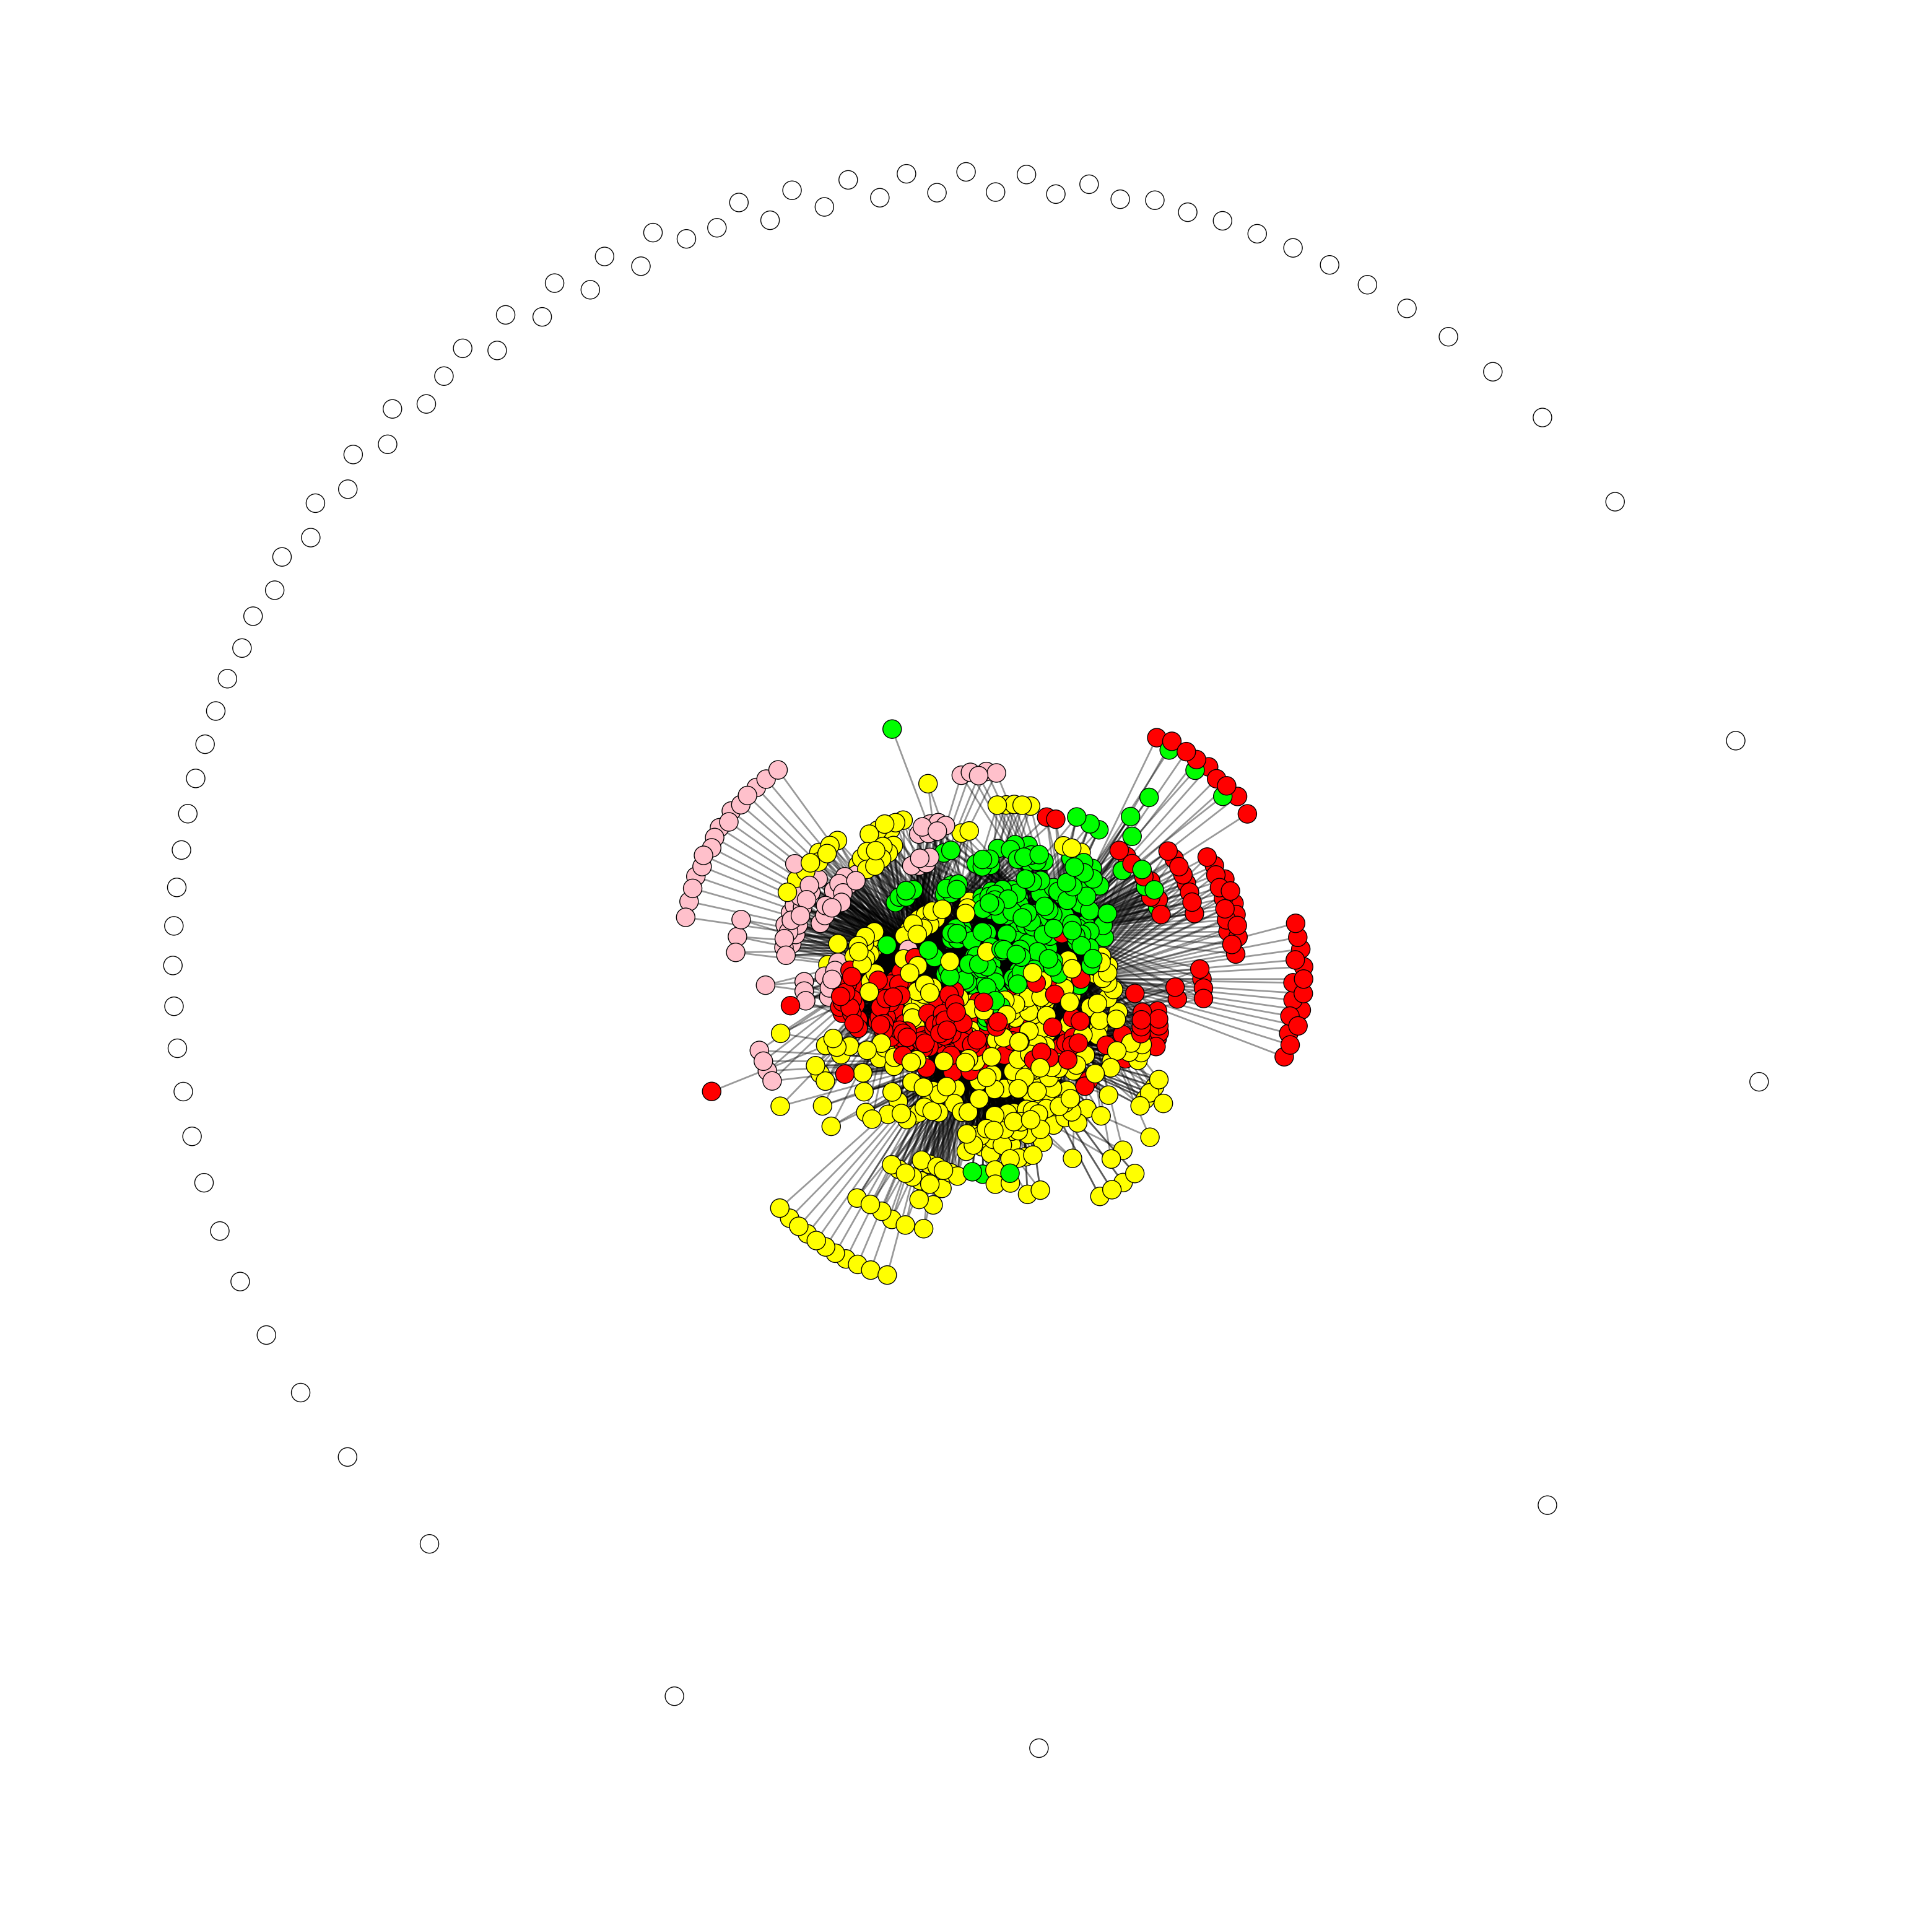

In [23]:
#DETECÇÃO DE COMUNIDADE NO SEGUNDO GRAFO USANDO FASTGREEDY
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

# Lê o arquivo CSV 
df = pd.read_csv('matriz.csv', header=0, index_col=0)

# Substitui as vírgulas por pontos
df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Converte as strings em floats
df = df.astype(float)

# Cria um gráfico com pesos
g = ig.Graph.Weighted_Adjacency(df.values.tolist(), mode="UNDIRECTED")

# Obtem o peso máximo
max_weight = max(g.es['weight'])
print(max_weight)

# Cria um subgrafo com arestas que têm 70% ou mais do peso máximo
sub_g = g.subgraph_edges(g.es.select(weight_ge=max_weight*0.70), delete_vertices=False)

# Define os rótulos dos vértices como atributos
sub_g.vs["name"] = df.index.tolist()

# Aplica o algoritmo de Fast Greedy para detecção de comunidades e devolve um dendrograma
clusters = sub_g.community_fastgreedy(weights=sub_g.es['weight'])

# Converte o dendrograma em uma partição no grafo
partition = clusters.as_clustering()

# Obtem a associação de vértices às comunidades
membership = partition.membership

# Cria um dicionário para armazenar as comunidades e seus vértices
communities = {}
for vertex, community in enumerate(membership):
    if community not in communities:
        communities[community] = []
    communities[community].append(vertex)

# Remove as comunidades que possuem apenas um vértice
for community, vertices in list(communities.items()):
    if len(vertices) == 1:
        del communities[community]
        membership = [m if m != community else None for m in membership]

colors = ["red", "green", "blue", "yellow", "pink"]
# Atualiza as cores dos vértices com base na nova associação à comunidade
vertex_colors = [membership[i] if membership[i] is not None else "white" for i in range(sub_g.vcount())]

# Atribui uma cor a cada comunidade
community_colors = [colors[i % len(colors)] if i is not None else "white" for i in membership]

# Mapeia os índices dos vértices no subgrafo para os rótulos ou índices originais do DataFrame
vertex_labels_original = df.index.tolist()
vertices_mapped_to_original = {community: [vertex_labels_original[i] for i in vertices] for community, vertices in communities.items()}

# Imprime os resultados
for community, vertices in vertices_mapped_to_original.items():
    # Encontra as arestas que têm ambos os vértices na comunidade atual
    edges = [e for e in sub_g.es if e.source in vertices and e.target in vertices]
    # Calcula a quantidade de arestas
    num_edges = len(edges)
    color = colors[community % len(colors)]
    print(f"Comunidade {community} (cor: {color}, quantidade de vértices: {len(vertices)}, quantidade de arestas: {num_edges}): {vertices}")
# Encontra os vértices que não têm comunidade
vertices_sem_comunidade = [v for v in vertex_labels_original if v not in sum(vertices_mapped_to_original.values(), [])]

# Imprime os vértices que não têm comunidade
print(f"Vértices sem comunidade, quantidade de vertices: {len(vertices_sem_comunidade)}: {vertices_sem_comunidade}")


# Plota o grafo com as novas cores dos vértices
layout = sub_g.layout_fruchterman_reingold()
fig, ax = plt.subplots(figsize=(40, 40))
ig.plot(sub_g, target=ax, layout=layout, edge_color=[(0, 0, 0, 0.4)] * sub_g.ecount(), vertex_color=community_colors)
plt.show()

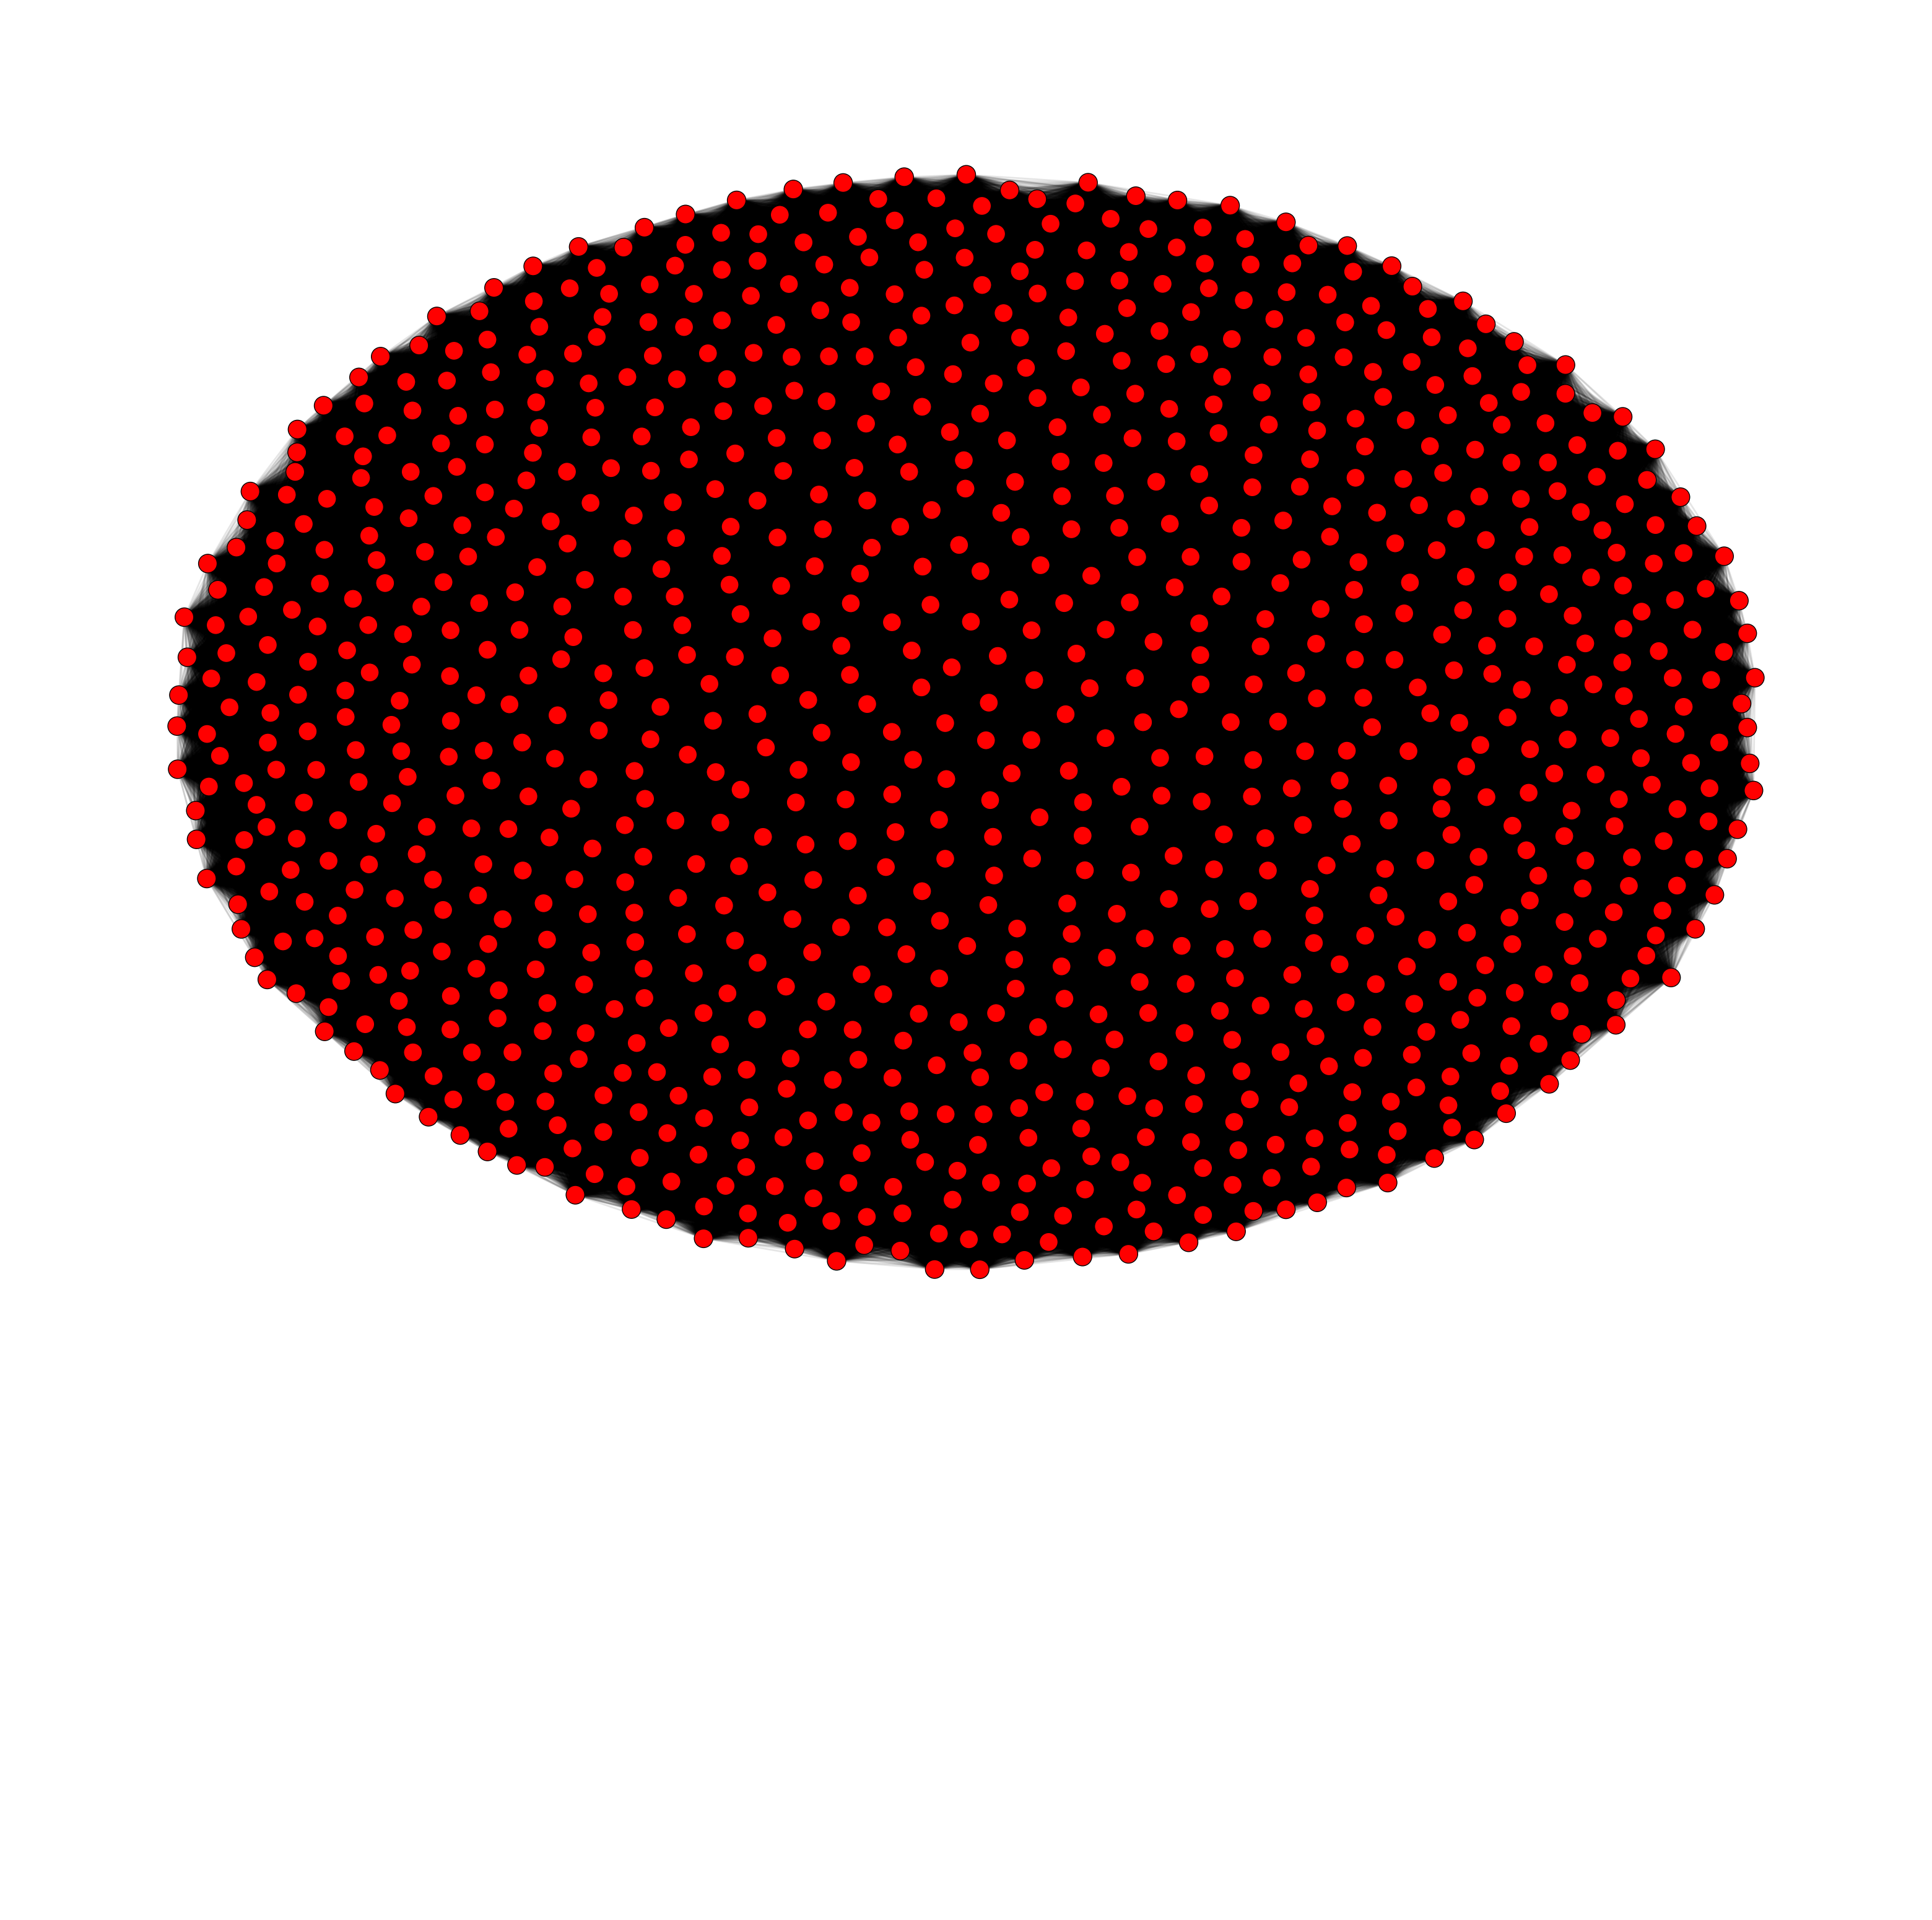

In [24]:
#PLOTE DO GRAFO GERAL 
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

# Lê o arquivo CSV 
df = pd.read_csv('matriz.csv', header=0, index_col=0)

# Substitui as vírgulas por pontos
df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Converte as strings em floats
df = df.astype(float)

# Cria um gráfico com pesos
g = ig.Graph.Weighted_Adjacency(df.values.tolist(), mode="UNDIRECTED")

# Plota o grafo com o layout Fruchterman Reingold
layout = g.layout("fr")
fig, ax = plt.subplots(figsize=(40, 40))
edge_opacity = 0.1 
ig.plot(g, target=ax, layout=layout, edge_color=[(0, 0, 0, edge_opacity)] * g.ecount())